In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

plt.ion()
data = pd.read_csv("Combined_first_spike.csv")

# Data Overview
# sns.boxplot(data=data,x="Feature name",y="Feature value",hue="Type")

# Reference:
# https://blog.csdn.net/Artoria_QZH/article/details/103217136
# https://blog.csdn.net/qq_46110834/article/details/111461809
# https://stackoverflow.com/questions/71008444/how-does-one-insert-statistical-annotations-e-g-p-values-into-a-seaborn-figur
# https://zhuanlan.zhihu.com/p/432236585

d:\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TTP-AHP_PD vs. TTP-AHP_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:2.318e-02 U_stat=1.400e+01
TTP-peak_PD vs. TTP-peak_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:7.255e-02 U_stat=6.050e+01
width_PD vs. width_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:8.314e-02 U_stat=2.000e+01


(<AxesSubplot:xlabel='Feature name', ylabel='Time (ms)'>,
  <statannotations.Annotation.Annotation at 0x1741138aaf0>])

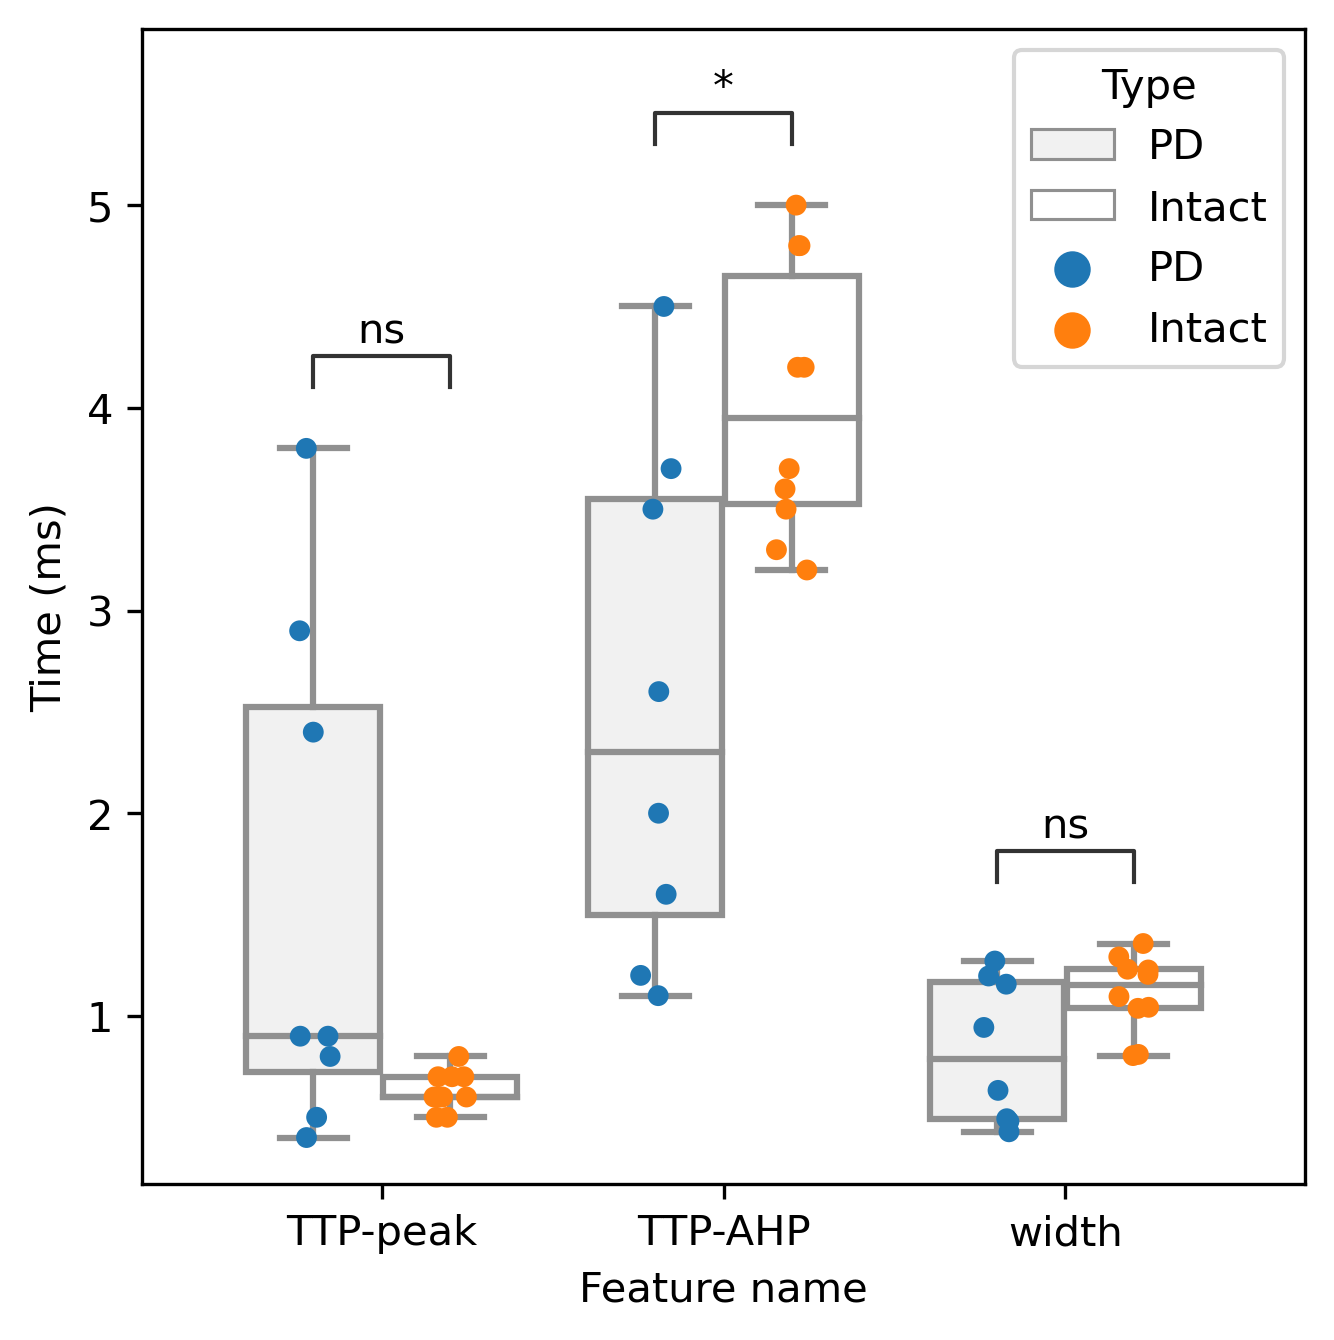

In [2]:
# fig,axes=plt.subplots(2,2,figsize=(5,5),sharex=False,sharey=False)
# fig.suptitle('Feature compariso')

fig,ax=plt.subplots(figsize=(5,5),dpi=300)

# In ms
# https://blog.csdn.net/qq_18351157/article/details/110683329
data_ms =data[data["Feature name"].str.contains("TTP-peak|TTP-AHP|width")]
ax = sns.boxplot(data=data_ms,x="Feature name",y="Feature value",hue="Type",whis=1.5,saturation=1,color="white")

grped_bplot = sns.stripplot(x='Feature name', y='Feature value', 
              data=data_ms, 
              hue='Type',
              marker='o', 
              dodge=True,
              jitter=True,
              alpha=1)


ax.set_ylabel("Time (ms)")
pairs=[
    (("width","PD"),("width","Intact")),
    (("TTP-AHP","PD"),("TTP-AHP","Intact")),
    (("TTP-peak","PD"),("TTP-peak","Intact"))]

annotator = Annotator(ax, pairs, data=data_ms, x="Feature name", y="Feature value",hue="Type")
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()



# In voltage
# https://blog.csdn.net/weixin_42575020/article/details/95344914
# data_mv = data[data['Feature name'].isin(['peak','threshold','minAHP','amplitude'])]
# axes[0][1]=sns.boxplot(data=data_mv,x="Feature name",y="Feature value",hue="Type")
# axes[0][1].set_ylabel("Voltage (mv)")
# pairs=[
#     (("peak","PD"),("peak","Intact")),
#     (("threshold","PD"),("threshold","Intact")),
#     (("minAHP","PD"),("minAHP","Intact")),
#     (("amplitude","PD"),("amplitude","Intact")),
#     ]

# annotator = Annotator(ax, pairs, data=data_mv, x="Feature name", y="Feature value",hue="Type")
# annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
# annotator.apply_and_annotate()

#Significance
# https://blog.csdn.net/SeizeeveryDay/article/details/121298940

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

peak_PD vs. peak_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:1.450e-02 U_stat=1.200e+01
amplitude_PD vs. amplitude_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:4.342e-02 U_stat=1.700e+01
threshold_PD vs. threshold_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:8.968e-01 U_stat=3.800e+01
minAHP_PD vs. minAHP_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:5.726e-01 U_stat=3.300e+01


(<AxesSubplot:xlabel='Feature name', ylabel='Voltage (mv)'>,
  <statannotations.Annotation.Annotation at 0x17412a3ef40>])

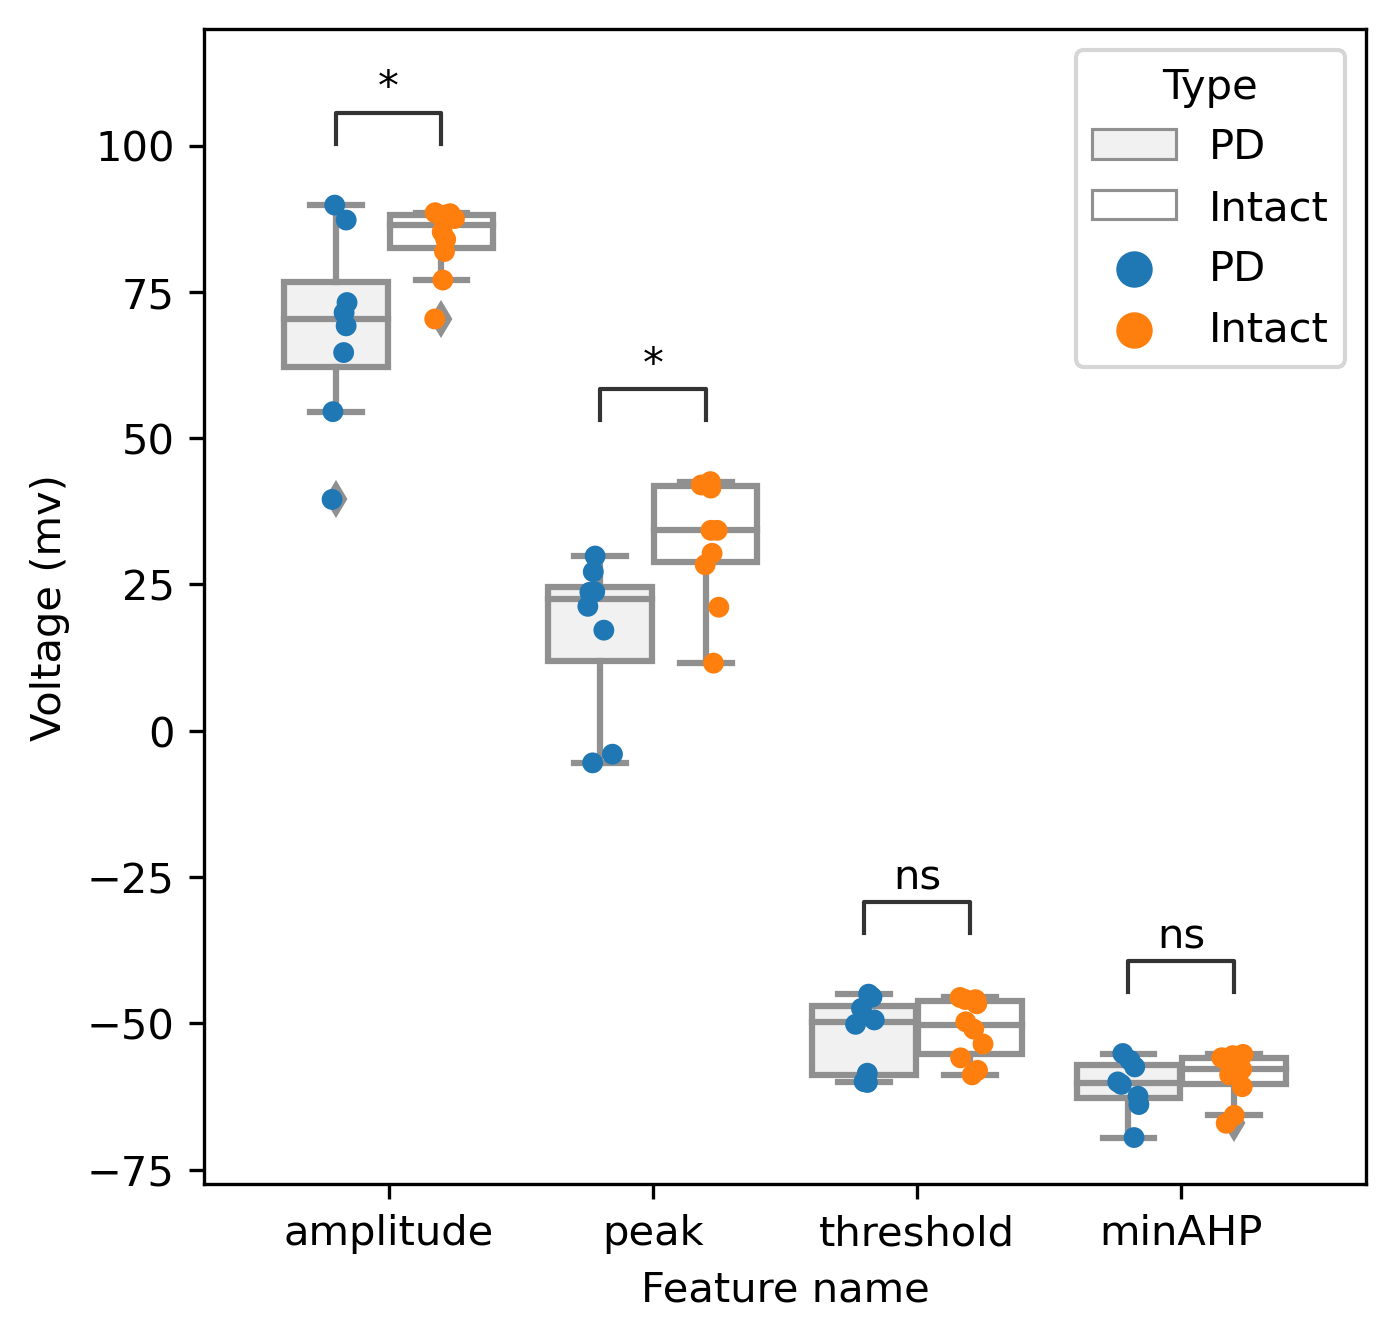

In [6]:
fig,ax=plt.subplots(figsize=(5,5),dpi=300)
data_mv = data[data['Feature name'].isin(['amplitude','peak','threshold','minAHP'])]

ax = sns.boxplot(data=data_mv,x="Feature name",y="Feature value",hue="Type",whis=1.5,saturation=1,color="white",order=['amplitude','peak','threshold','minAHP'])
grped_bplot = sns.stripplot(x='Feature name', y='Feature value', 
              data=data_mv, 
              hue='Type',
              marker='o', 
              dodge=True,
              jitter=True,
              alpha=1,
              order=['amplitude','peak','threshold','minAHP'])


ax.set_ylabel("Voltage (mv)")
pairs=[
    (("peak","PD"),("peak","Intact")),
    (("threshold","PD"),("threshold","Intact")),
    (("amplitude","PD"),("amplitude","Intact")),
    (("minAHP","PD"),("minAHP","Intact")),
    ]

annotator = Annotator(ax, pairs, data=data_mv, x="Feature name", y="Feature value",hue="Type",order=['amplitude','peak','threshold','minAHP'])
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()

d:\Anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
d:\Anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
d:\Anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
d:\Anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(
d:\Anaconda3\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same paramete

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TTP-AHP_PD vs. TTP-AHP_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:2.318e-02 U_stat=1.400e+01
TTP-peak_PD vs. TTP-peak_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:7.255e-02 U_stat=6.050e+01
width_PD vs. width_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:8.314e-02 U_stat=2.000e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

minAHP_PD vs. minAHP_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:5.726e-01 U_stat=3.300e+01
peak_PD vs. peak_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:1.450e-02 U_stat=1.200e+01
threshold_PD vs. threshold_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:8.968e-01 U_stat=3.800e+01
amplitude_PD vs. amplitude_Intac

(<Axes: xlabel='Feature name', ylabel='Voltage (mv)'>,
  <statannotations.Annotation.Annotation at 0x1b68f5a1fa0>])

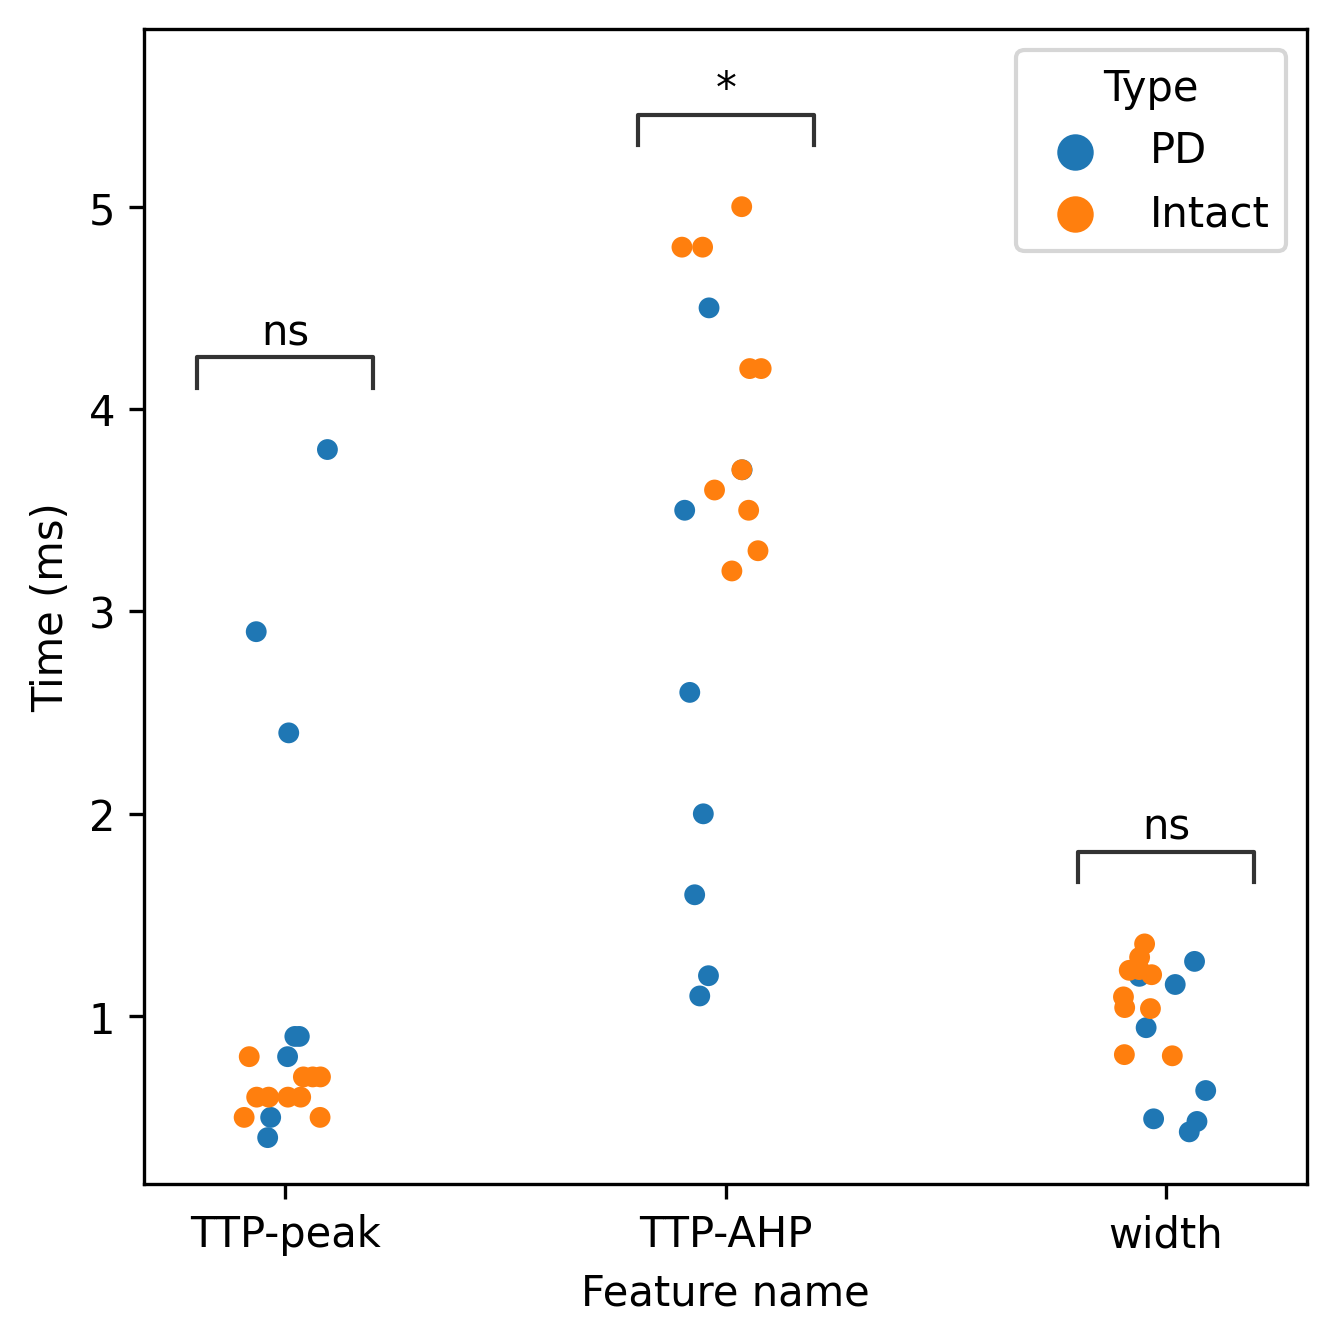

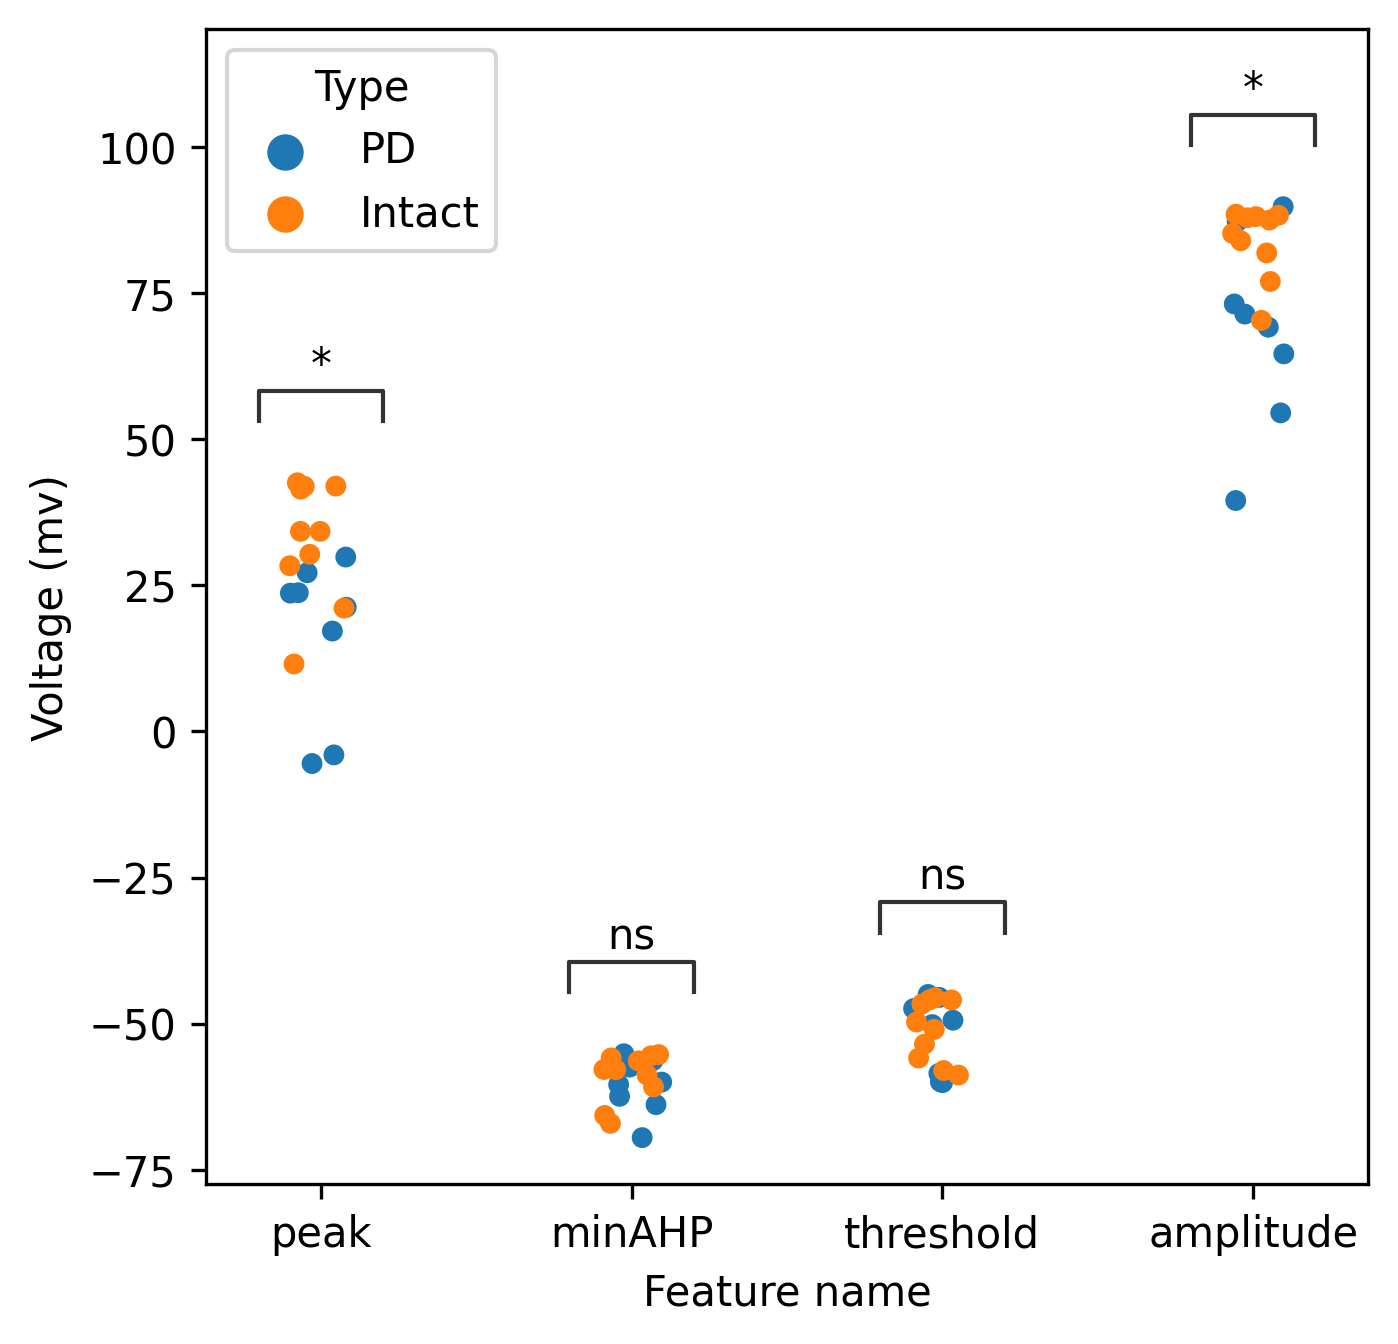

In [10]:
fig,ax=plt.subplots(figsize=(5,5),dpi=300)

# In ms
# https://blog.csdn.net/qq_18351157/article/details/110683329
data_ms =data[data["Feature name"].str.contains("TTP-peak|TTP-AHP|width")]
ax = sns.stripplot(data=data_ms,x="Feature name",y="Feature value",hue="Type")
ax.set_ylabel("Time (ms)")
pairs=[
    (("width","PD"),("width","Intact")),
    (("TTP-AHP","PD"),("TTP-AHP","Intact")),
    (("TTP-peak","PD"),("TTP-peak","Intact"))]

annotator = Annotator(ax, pairs, data=data_ms, x="Feature name", y="Feature value",hue="Type")
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()


fig,ax=plt.subplots(figsize=(5,5),dpi=300)
data_mv = data[data['Feature name'].isin(['peak','threshold','minAHP','amplitude'])]
ax=sns.stripplot(data=data_mv,x="Feature name",y="Feature value",hue="Type",jitter=True)
ax.set_ylabel("Voltage (mv)")
pairs=[
    (("peak","PD"),("peak","Intact")),
    (("threshold","PD"),("threshold","Intact")),
    (("minAHP","PD"),("minAHP","Intact")),
    (("amplitude","PD"),("amplitude","Intact")),
    ]

annotator = Annotator(ax, pairs, data=data_mv, x="Feature name", y="Feature value",hue="Type")
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()

Text(0, 0.5, 'Time (ms)')

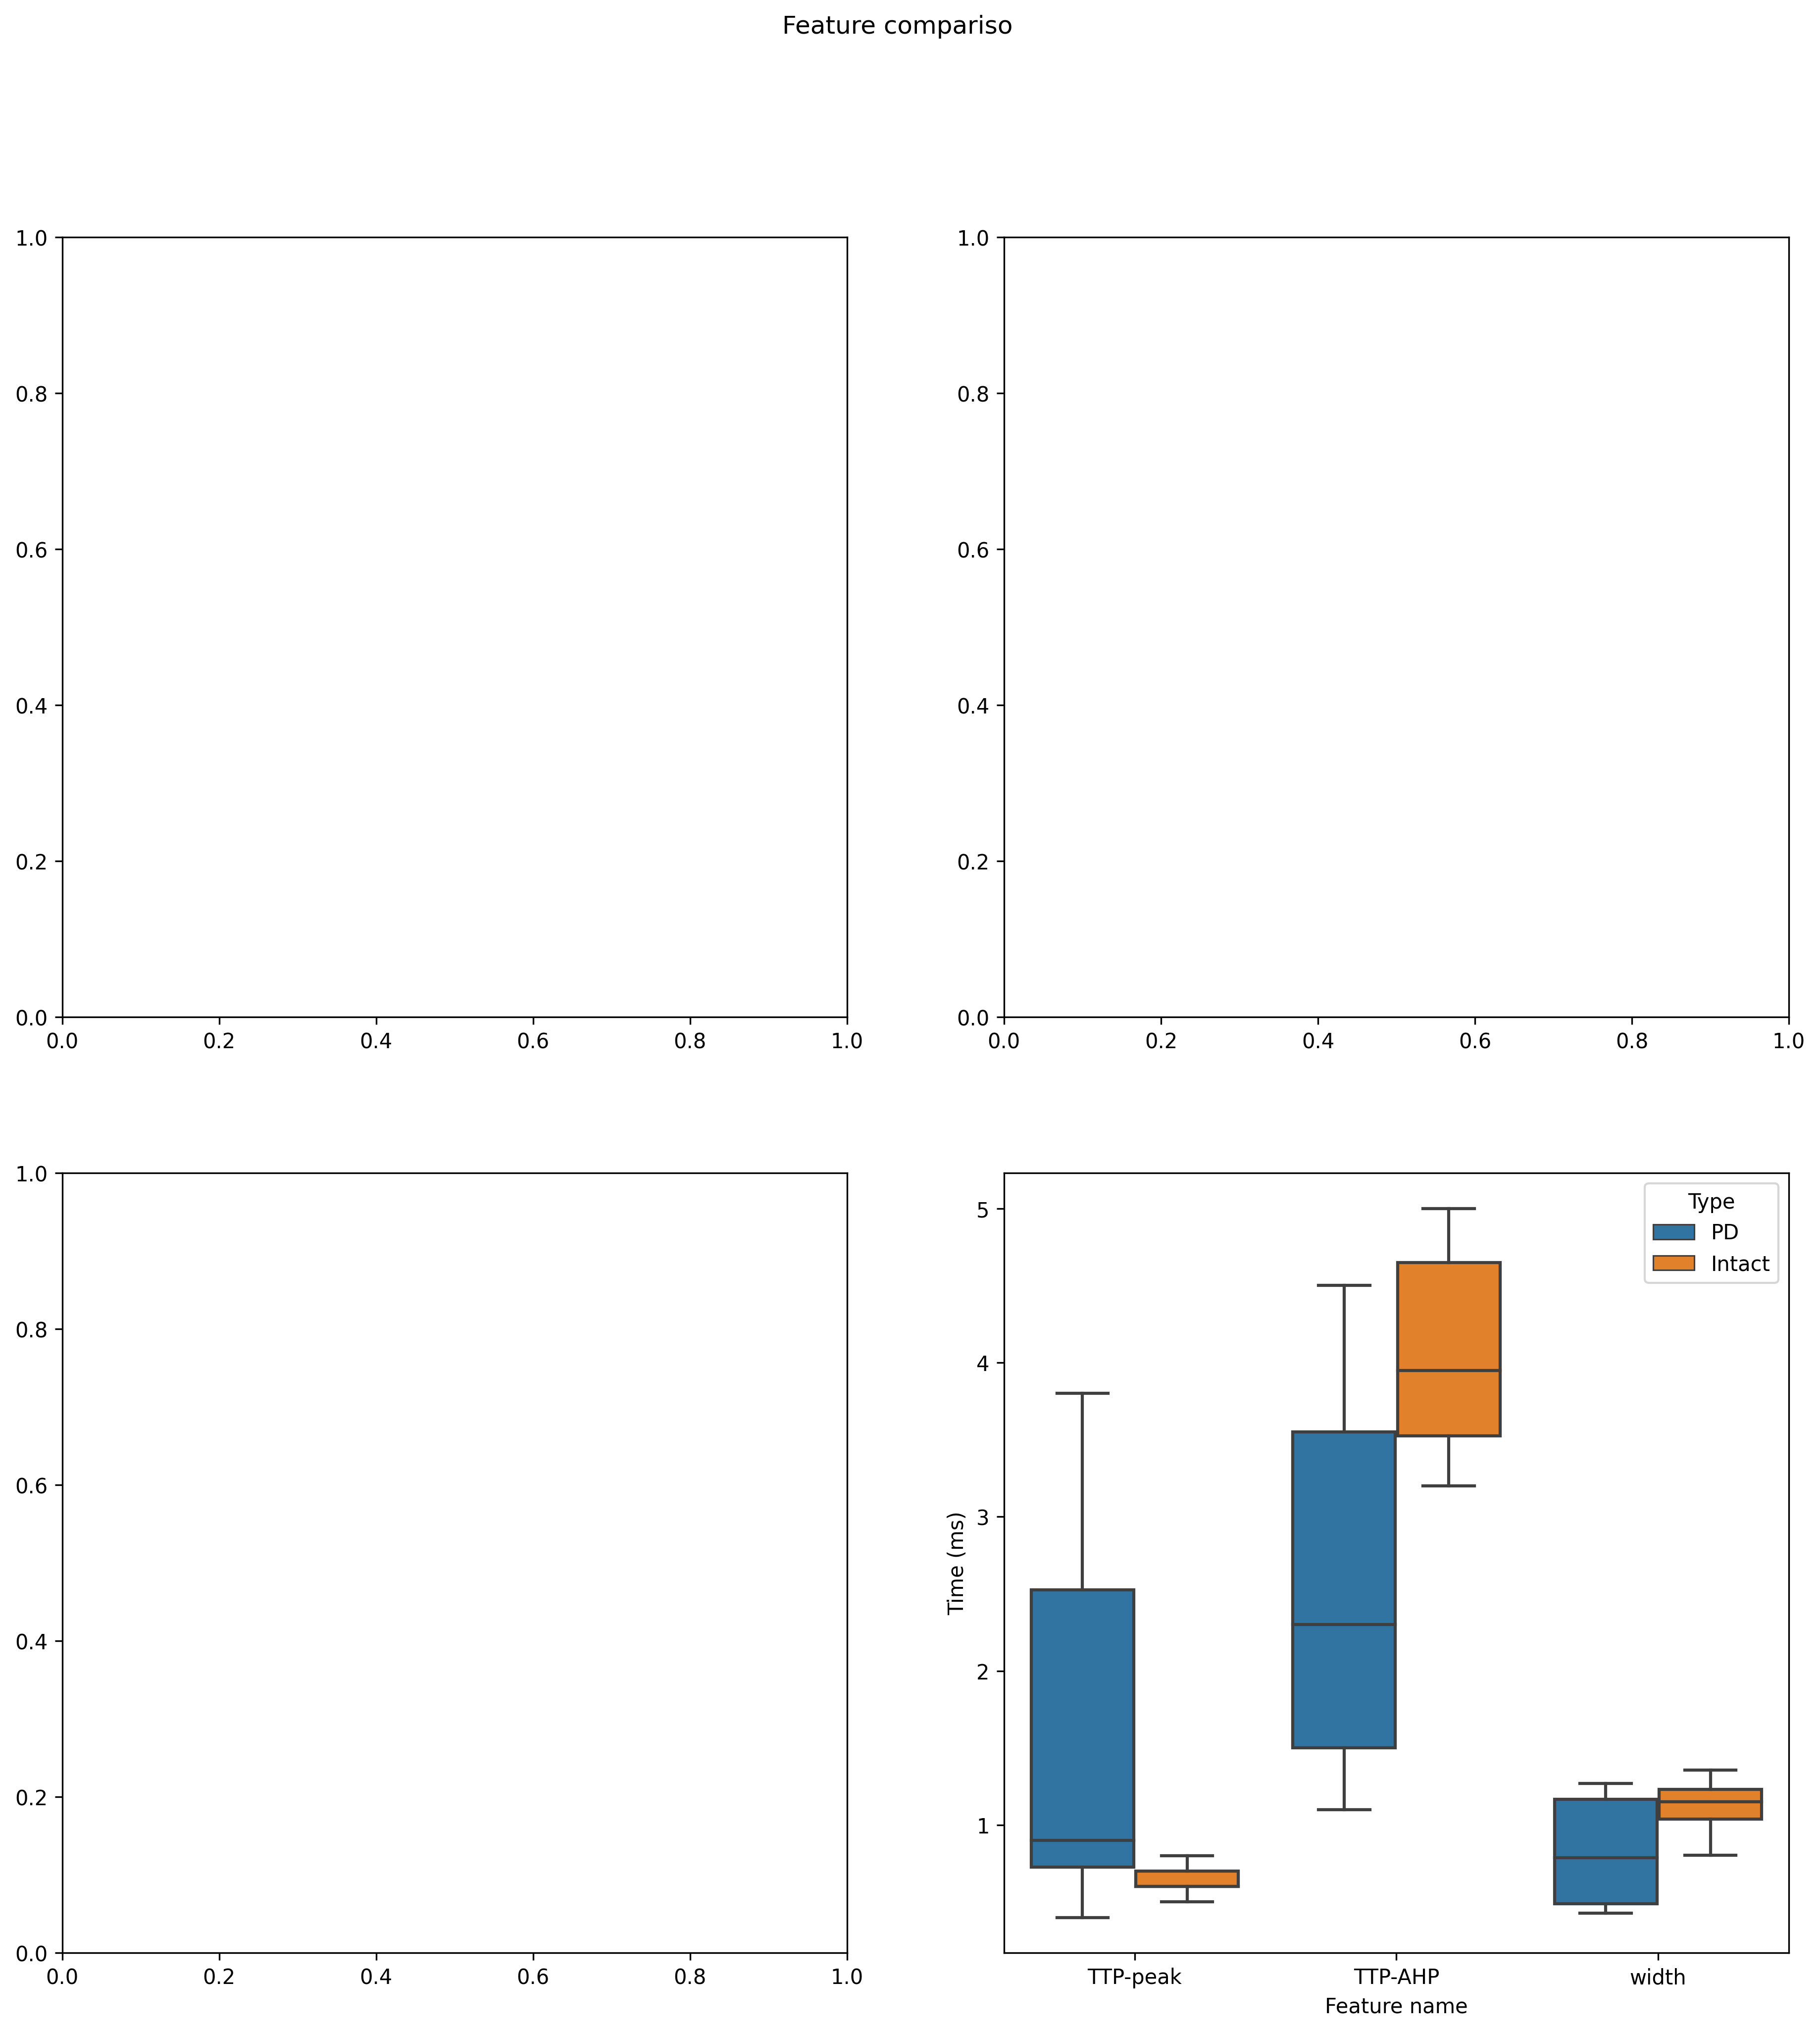

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(15,15),dpi=300,sharex=False,sharey=False)
fig.suptitle('Feature compariso')


# In ms
# https://blog.csdn.net/qq_18351157/article/details/110683329
data_ms =data[data["Feature name"].str.contains("TTP-peak|TTP-AHP|width")]
axs[0][0] = sns.boxplot(data=data_ms,x="Feature name",y="Feature value",hue="Type")
axs[0][0].set_ylabel("Time (ms)")

TypeError: 'Axes' object is not subscriptable

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

TTP-AHP_PD vs. TTP-AHP_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:2.318e-02 U_stat=1.400e+01
TTP-peak_PD vs. TTP-peak_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:7.255e-02 U_stat=6.050e+01
width_PD vs. width_Intact: Mann-Whitney-Wilcoxon test two-sided, P_val:8.314e-02 U_stat=2.000e+01


Text(55.847222222222214, 0.5, 'Time (ms)')

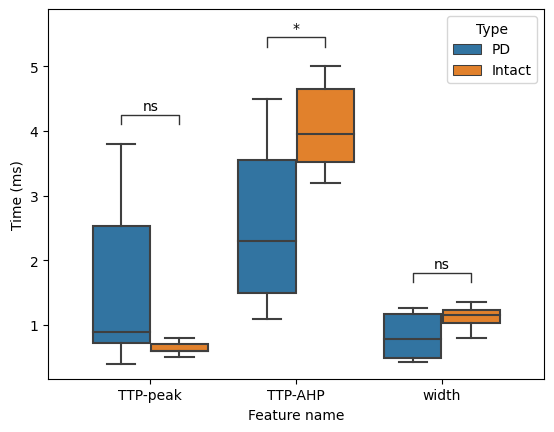

In [ ]:
fig,ax=plt.subplots()
# In ms
# https://blog.csdn.net/qq_18351157/article/details/110683329
data_ms =data[data["Feature name"].str.contains("TTP-peak|TTP-AHP|width")]
ax = sns.boxplot(data=data_ms,x="Feature name",y="Feature value",hue="Type")
pairs=[
    (("width","PD"),("width","Intact")),
    (("TTP-AHP","PD"),("TTP-AHP","Intact")),
    (("TTP-peak","PD"),("TTP-peak","Intact"))]

annotator = Annotator(ax, pairs, data=data_ms, x="Feature name", y="Feature value",hue="Type")
annotator.configure(test='Mann-Whitney', text_format='star',line_height=0.03,line_width=1)
annotator.apply_and_annotate()


plt.ylabel("Time (ms)")

In [ ]:
data_ms.head()

,Unnamed: 0,Feature value,Feature name,Type
24,0,3.8,TTP-peak,PD
25,1,0.8,TTP-peak,PD
26,2,0.9,TTP-peak,PD
27,3,0.9,TTP-peak,PD
28,4,0.5,TTP-peak,PD


In [ ]:
a= data["Feature name"].str.contains("TTP-peak|TTP-AHP|width")
data[a]

,Unnamed: 0,Feature value,Feature name,Type
24,0,3.8000,TTP-peak,PD
25,1,0.8000,TTP-peak,PD
26,2,0.9000,TTP-peak,PD
27,3,0.9000,TTP-peak,PD
28,4,0.5000,TTP-peak,PD
29,5,2.9000,TTP-peak,PD
30,6,0.4000,TTP-peak,PD
31,7,2.4000,TTP-peak,PD
32,0,2.6000,TTP-AHP,PD
33,1,3.7000,TTP-AHP,PD
